<a href="https://colab.research.google.com/github/nojihun/save/blob/main/AI_05_%EB%85%B8%EC%A7%80%ED%9B%88_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
from google.colab import files
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
uploaded = files.upload()

In [2]:
df = pd.read_csv('vgames2.csv')
df = df.dropna() #결측치 제거

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.</p>
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.</p>
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

In [3]:
def my_1(x):# 매출액서 K 와 M을 빼내기 위한 함수
  val= x.find('K')
  val2=x.find('M')
  if val != -1:
    x = x.replace('K','')
    x = float(x)
    x = x*1000
  elif val2 != - 1:
    x=x.replace('M','')
    x=float(x)
    x = x*1000000
  else:
    x = float(x)
  return x

df['NA_Sales']= df['NA_Sales'].apply(my_1)
df['EU_Sales']= df['EU_Sales'].apply(my_1)
df['JP_Sales']= df['JP_Sales'].apply(my_1)
df['Other_Sales']= df['Other_Sales'].apply(my_1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  float64
 7   EU_Sales     16241 non-null  float64
 8   JP_Sales     16241 non-null  float64
 9   Other_Sales  16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
 # 연도에 오류가나서 제대로 표시 되지 않은 데이터들을 제거
de = df[df['Year']<=1899].index
df = df.drop(de)
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
da = df[df['NA_Sales'] >= 20] #매우 잘팔린 게임들 df_best, 올해 10년간 잘팔린 게임들 df_best_n
db = df[df['EU_Sales']>=20]
dc= df[df['JP_Sales']>=20]
dd = df[df['Other_Sales']>=20]
de = pd.concat([da,db,dc,dd])
df_best = de.drop_duplicates(['Name'])
df_best = df_best.drop(['Unnamed: 0'], axis = 'columns')
df_best = df_best.reset_index()
df_best = df_best.drop(['index'] , axis = 'columns')
df_best_n = df_best[df_best['Year']>=2010]
df_best_n

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Resident Evil: Revelations 2,PS3,2015.0,Action,Capcom,60000.00,0.08,0.16,0.03
2,Medal of Honor: Warfighter,X360,2012.0,Action,Electronic Arts,580000.00,0.47,0.01,0.10
3,F1 2010,PS3,2010.0,Racing,Codemasters,250000.00,0.76,0.08,0.27
15,FIFA 15,PSV,2014.0,Sports,Electronic Arts,130000.00,0.48,0.04,0.19
16,Song of the Deep,PS4,2016.0,Action,Insomniac Games,50000.00,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...
427,FIFA Soccer 11,X360,2010.0,Sports,Electronic Arts,0.71,2.40,0.02,400000.00
430,BioShock Infinite,PS3,2013.0,Shooter,Take-Two Interactive,0.72,0.69,0.04,310000.00
431,Dark Souls,X360,2011.0,Role-Playing,Namco Bandai Games,0.64,0.28,0.00,80000.00
432,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,0.96,2.00,0.21,560000.00


In [6]:
de = df[df['NA_Sales'] >= 100].index #대박이 나서 평균에 큰 영향을 미치는 것들을 빼는 건데... 이게 맞나??
df1 = df.drop(de)
de = df1[df1['EU_Sales']>=100].index
df1 = df1.drop(de)
de = df1[df1['JP_Sales']>=100].index
df1 = df1.drop(de)
de = df1[df1['Other_Sales']>=100].index
df1 = df1.drop(de)
df1

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
df1=df1.drop(['Unnamed: 0'], axis ='columns' )
df1 = df1.reset_index()
df1=df1.drop(['index'], axis ='columns' )
df1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
15692,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
15693,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
15694,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
15695,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
df_n = df1[df1['Year']>=2010]

In [9]:
# 장르와 지역

df2= pd.DataFrame(df1.groupby(['Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) # 장르에 따른 지역별 수입
df2= df2.T
df2 = df2.reset_index()
df2

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA_Sales,0.257654,0.078609,0.261696,0.236346,0.498972,0.217093,0.286687,0.201792,0.444041,0.213549,0.286908,0.101137
1,EU_Sales,0.155841,0.048891,0.117525,0.124603,0.223567,0.091316,0.190537,0.113824,0.239000,0.132110,0.157980,0.066667
2,JP_Sales,0.048209,0.041166,0.102797,0.063598,0.147654,0.102687,0.044395,0.225262,0.029780,0.075463,0.059066,0.071859
3,Other_Sales,0.056349,0.012966,0.042760,0.043512,0.058102,0.022194,0.062853,0.036183,0.078724,0.036476,0.056813,0.016559


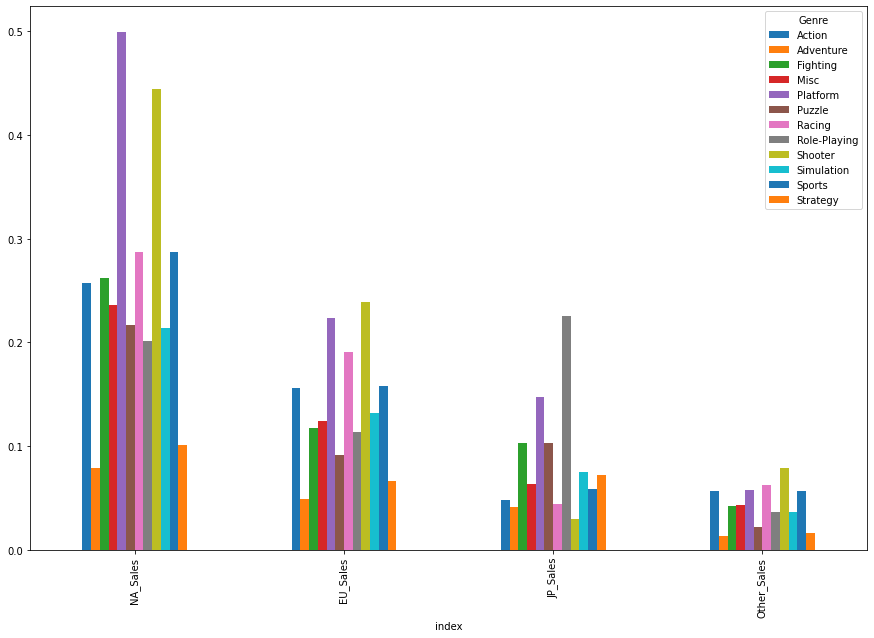

In [10]:
df2.plot(x= 'index', y=['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy'], kind="bar",figsize=(15,10))
plt.show()

In [11]:
from scipy.stats import chi2_contingency

In [12]:
df2 = df2.set_index('index')
df2

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
index,,,,,,,,,,,,
NA_Sales,0.257654,0.078609,0.261696,0.236346,0.498972,0.217093,0.286687,0.201792,0.444041,0.213549,0.286908,0.101137
EU_Sales,0.155841,0.048891,0.117525,0.124603,0.223567,0.091316,0.190537,0.113824,0.239000,0.132110,0.157980,0.066667
JP_Sales,0.048209,0.041166,0.102797,0.063598,0.147654,0.102687,0.044395,0.225262,0.029780,0.075463,0.059066,0.071859
Other_Sales,0.056349,0.012966,0.042760,0.043512,0.058102,0.022194,0.062853,0.036183,0.078724,0.036476,0.056813,0.016559


In [13]:
chi2_contingency(df2)

(0.4715418107758973,
 1.0,
 33,
 array([[0.254375  , 0.08918508, 0.25767674, 0.22982697, 0.45581255,
         0.21275491, 0.28698809, 0.28334914, 0.38866524, 0.2246901 ,
         0.27534873, 0.12581004],
        [0.13705237, 0.04805121, 0.13883129, 0.12382636, 0.24558306,
         0.11462827, 0.15462368, 0.15266309, 0.20940538, 0.12105872,
         0.14835262, 0.06778404],
        [0.08345379, 0.02925929, 0.08453701, 0.07540022, 0.14954018,
         0.06979932, 0.09415329, 0.09295945, 0.12751091, 0.07371495,
         0.09033472, 0.04127499],
        [0.04317182, 0.01513625, 0.04373219, 0.0390056 , 0.07735925,
         0.03610818, 0.04870683, 0.04808923, 0.06596319, 0.03813379,
         0.04673143, 0.02135213]]))

결론 p값이 1이니 지역에 따른 장르의 선호도가 다르다고 볼 수 없다.

In [14]:
df2_best= pd.DataFrame(df_best_n.groupby(['Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #잘팔린 게임들 중에서 장르에 따른 지역별 선호도.
df2_best= df2_best.T
df2_best = df2_best.reset_index()
df2_best

Genre,index,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,NA_Sales,324054.242162,3333.348333,113333.410000,31875.100000,147500.59625,0.016667,477500.0300,31666.881111,650667.306667,0.32,230000.425385,205000.0500
1,EU_Sales,93513.747838,11666.671667,7777.891111,53750.063125,191250.17875,16666.673333,0.4650,8889.088333,310666.988000,30000.00,248462.187692,2500.2575
2,JP_Sales,18918.938919,10000.000000,41111.133333,0.000000,56250.14125,0.000000,0.0225,75000.076667,2666.694000,0.00,0.062308,0.0000
3,Other_Sales,9189.286216,0.005000,0.048889,7500.024375,20000.08625,3333.336667,5000.1225,51666.676667,25333.515333,0.03,45384.799231,70000.0025


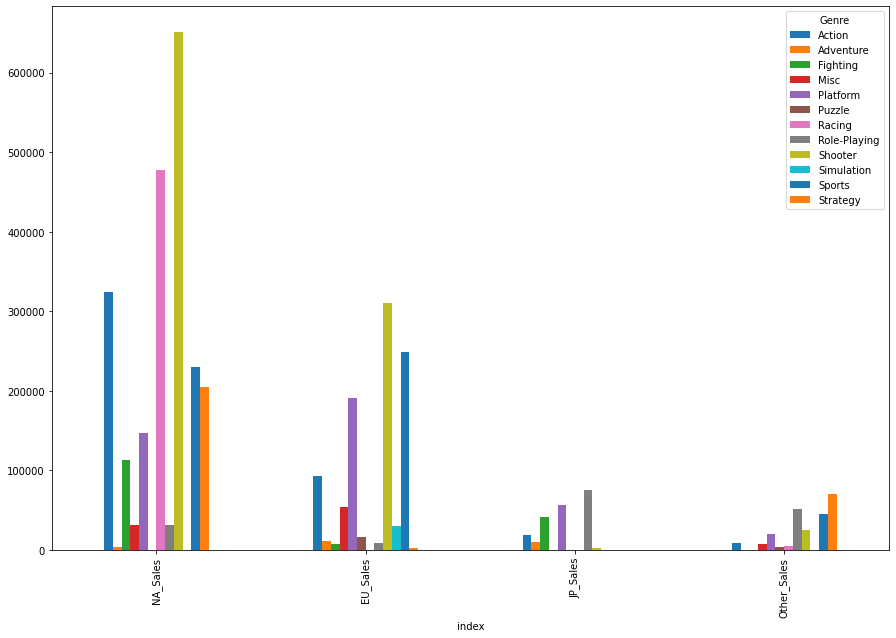

In [15]:
df2_best.plot(x= 'index', y=['Action',	'Adventure',	'Fighting',	'Misc',	'Platform',	'Puzzle',	'Racing',	'Role-Playing',	'Shooter',	'Simulation',	'Sports',	'Strategy'], kind="bar",figsize=(15,10))
plt.show()

In [16]:
df2_best = df2_best.set_index('index')


In [17]:
chi2_contingency(df2_best)

(2021606.4241866346,
 0.0,
 33,
 array([[271832.89578599,  15248.35510554,  98944.9423338 ,
          56800.18033061, 253123.0530879 ,  12198.68815065,
         294293.3496014 , 101994.75635045, 603428.34997773,
          18298.22130539, 319512.17305079, 169256.7614943 ],
        [119676.95070307,   6713.22960009,  43561.4275151 ,
          25006.80560275, 111439.76912221,   5370.58547026,
         129565.37357501,  44904.13639023, 265664.92140075,
           8055.96144936, 140668.19423259,  74516.85728817],
        [ 25029.90122983,   1404.0420719 ,   9110.67855362,
           5230.06201807,  23307.13138844,   1123.23403193,
          27098.02083306,   9391.50013478,  55562.63510915,
           1684.868458  ,  29420.12632454,  15584.8688233 ],
        [ 29136.46741624,   1634.39822248,  10605.43493081,
           6088.13954858,  27131.04890146,   1307.51901382,
          31543.89599053,  10932.32990231,  64678.59751237,
           1961.29878725,  34246.98100747,  18141.82239423]]))

In [18]:
df3= pd.DataFrame(df1.groupby(['Year','Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #시간에 따른 장르 변화도를 추적하기위해 연도병 장르에 수입들
df3["sum"] = df3[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df3 = pd.DataFrame(df3['sum'])
df3 = df3.reset_index()
df3 = df3.pivot_table(index = 'Year', columns = 'Genre', values = 'sum')
df3= df3.fillna(0)
header = list(df3.columns.values)
df3= df3.reset_index()
df3 #연도별장르 수익

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,0.340000,0.000000,0.770000,0.675000,0.000000,0.000000,0.000000,0.000000,3.535000,0.000000,0.000000,0.000000
1,1981.0,0.534167,0.000000,0.000000,0.000000,2.306667,1.125000,0.480000,0.000000,1.002000,0.440000,0.195000,0.000000
2,1982.0,0.361111,0.000000,0.000000,0.870000,1.006000,3.346667,0.785000,0.000000,0.762000,0.000000,0.530000,0.000000
3,1983.0,0.408571,0.400000,0.000000,2.140000,1.386000,0.780000,0.000000,0.000000,0.490000,0.000000,3.200000,0.000000
4,1984.0,1.850000,0.000000,0.000000,1.450000,0.690000,1.046667,1.983333,0.000000,10.366667,0.000000,3.085000,0.000000
5,1985.0,1.760000,0.000000,1.050000,0.000000,13.890000,0.802500,0.000000,0.000000,1.000000,0.040000,1.960000,0.000000
6,1986.0,2.290000,0.000000,0.000000,0.000000,1.668000,0.000000,1.960000,2.520000,0.972500,0.000000,1.860000,0.000000
7,1987.0,0.555000,4.380000,2.710000,0.000000,0.870000,0.000000,0.000000,1.550000,0.345000,0.000000,0.927500,0.000000
8,1988.0,0.870000,0.000000,0.000000,0.000000,6.756667,5.580000,2.140000,1.960000,0.510000,0.030000,1.800000,0.000000
9,1989.0,2.325000,0.000000,0.000000,1.280000,6.886667,9.422500,0.000000,1.100000,1.190000,0.000000,1.906667,0.000000


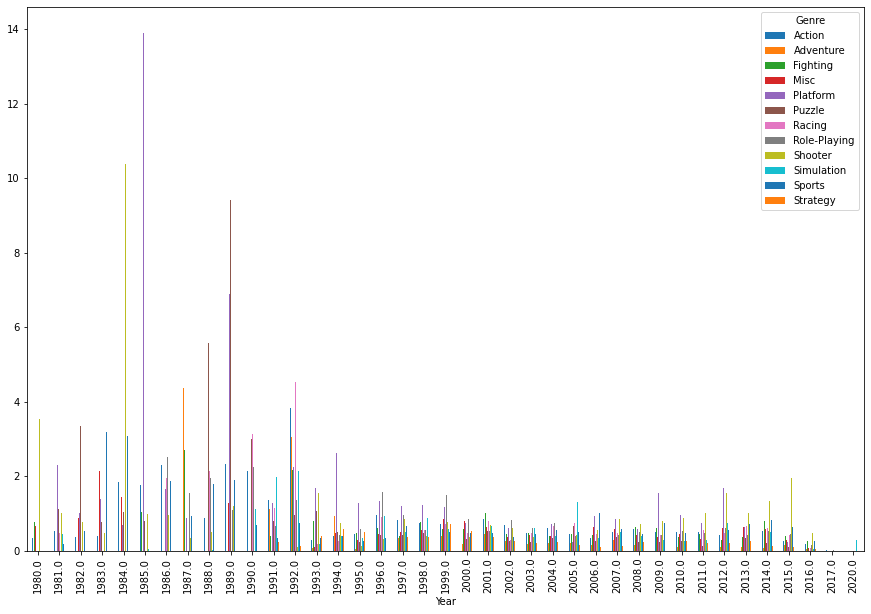

In [19]:
df3.plot(x= 'Year', y= header, kind="bar",figsize=(15,10))
plt.show()

In [20]:
df3 = df3.set_index('Year')

In [21]:
chi, p, n, static = chi2_contingency(df3)
chi, p, n

(305.7536568971036, 0.9999903669560812, 418)

P값이 큼 즉 연도별로 선호하는 장르가 달라진다고 볼 수 없음

In [22]:
df3 = df3.reset_index()

In [23]:
df3_n = df3[df3['Year']>=2010]
df3_n

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
30,2010.0,0.517623,0.109467,0.372000,0.449267,0.969655,0.252500,0.599464,0.537789,0.872597,0.275897,0.471823,0.265102
31,2011.0,0.506537,0.149245,0.450217,0.306742,0.758889,0.125526,0.553333,0.466848,1.002247,0.278889,0.453983,0.197111
32,2012.0,0.434080,0.103509,0.293333,0.616111,1.685455,0.158182,0.487586,0.609600,1.561522,0.742778,0.569623,0.222000
33,2013.0,0.748811,0.111525,0.379474,0.629750,0.638824,0.333333,0.673077,0.421970,1.005965,0.482222,0.721373,0.258889
34,2014.0,0.536685,0.080946,0.788947,0.578780,0.887000,0.214286,0.618889,0.518182,1.332727,0.503636,0.819245,0.121250
35,2015.0,0.271388,0.153654,0.388000,0.302895,0.228333,0.115000,0.416842,0.437568,1.944706,0.374000,0.627377,0.107059
36,2016.0,0.171739,0.054242,0.275000,0.064118,0.208000,0.000000,0.085263,0.168462,0.488571,0.043333,0.268889,0.052000
37,2017.0,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000
38,2020.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290000,0.000000,0.000000


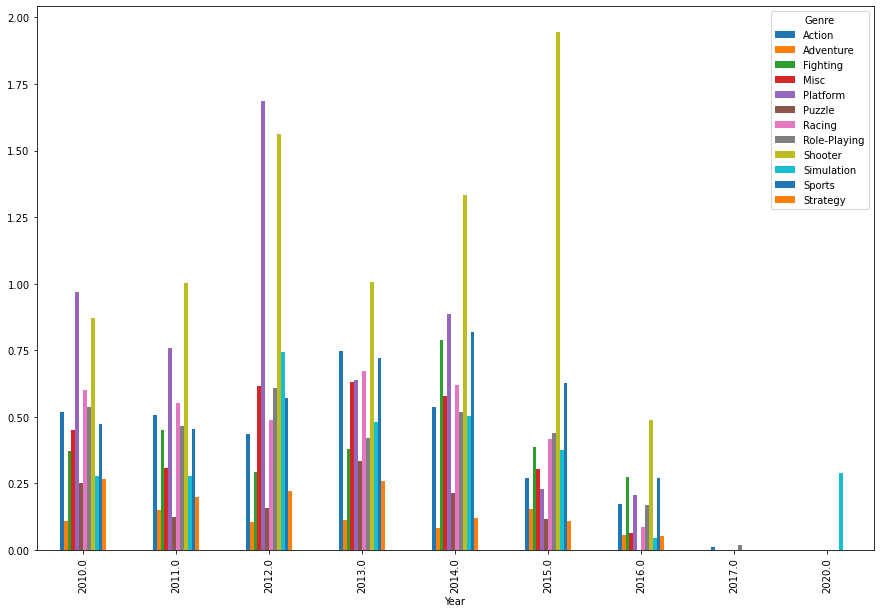

In [24]:
df3_n.plot(x= 'Year', y= header, kind="bar",figsize=(15,10)) #최근 10년간 유행한 장르
plt.show()

In [25]:
df3_n = df3_n.set_index('Year')
chi, p, n, static = chi2_contingency(df3_n)
chi, p, n


(7.259210307995383, 1.0, 88)

In [26]:
df3_best= pd.DataFrame(df_best.groupby(['Year','Genre'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #시간에 따른 장르 변화도를 추적하기위해 연도병 장르에 수입들
df3_best["sum"] = df3_best[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df3_best = pd.DataFrame(df3_best['sum'])
df3_best = df3_best.reset_index()
df3_best = df3_best.pivot_table(index = 'Year', columns = 'Genre', values = 'sum')
df3_best= df3_best.fillna(0)
header = list(df3_best.columns.values)
df3_best= df3_best.reset_index()
df3_best #연도별장르 수익

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,1981.0,1.100019e+05,0.0000,0.000000,0.000000,0.000000e+00,0.000000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
1,1984.0,0.000000e+00,0.0000,0.000000,0.000000,0.000000e+00,0.000000,0.000,0.000000e+00,2.831000e+01,0.000000e+00,0.000000e+00,0.00
2,1985.0,0.000000e+00,0.0000,0.000000,0.000000,2.300206e+05,0.000000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
3,1988.0,0.000000e+00,0.0000,0.000000,0.000000,1.900073e+05,0.000000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
4,1989.0,0.000000e+00,0.0000,0.000000,0.000000,0.000000e+00,30015.130000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
5,1990.0,0.000000e+00,0.0000,0.000000,0.000000,2.000117e+04,0.000000,0.000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
6,1991.0,0.000000e+00,0.0000,0.000000,80000.000000,0.000000e+00,0.000000,0.000,0.000000e+00,0.000000e+00,1.600000e+05,0.000000e+00,0.00
7,1994.0,0.000000e+00,0.0000,770000.310000,0.000000,0.000000e+00,0.000000,260000.000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+04,0.00
8,1995.0,0.000000e+00,0.0000,340001.590000,110000.000000,0.000000e+00,0.000000,0.000,0.000000e+00,3.000004e+04,2.500003e+04,0.000000e+00,0.00
9,1996.0,2.033345e+05,0.0000,0.000000,0.000000,1.460005e+06,0.000000,5550004.320,0.000000e+00,2.000001e+04,4.000006e+04,5.500005e+04,0.00


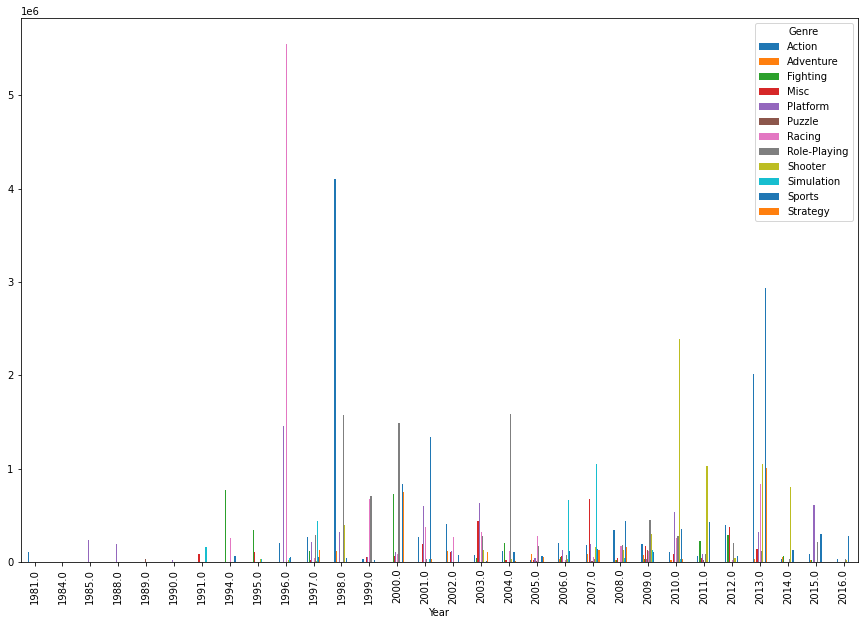

In [27]:
df3_best.plot(x= 'Year', y= header, kind="bar",figsize=(15,10))
plt.show()

In [28]:
df3_best_n = df3_best[df3_best['Year']>=2010]
df3_best_n

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
23,2010.0,1.033339e+05,16666.70,0.000000,86666.867778,530001.400000,0.000000,250001.11,280000.175000,2.383334e+06,30000.35,3.475013e+05,33333.53
24,2011.0,6.000022e+04,0.00,223333.576667,40000.194000,80000.720000,20000.026667,0.00,80000.920000,1.030002e+06,0.00,4.300004e+05,0.00
25,2012.0,3.953852e+05,0.00,285000.520000,370000.080000,0.000000,0.000000,20000.27,206667.143333,4.000051e+04,0.00,6.000065e+04,0.00
26,2013.0,2.010002e+06,30000.00,0.000000,140000.140000,320000.803333,0.000000,830000.59,117500.555000,1.045002e+06,0.00,2.930001e+06,1010000.65
27,2014.0,3.500010e+04,50000.05,66666.860000,0.000000,0.000000,0.000000,0.00,25000.115000,8.033350e+05,0.00,1.300007e+05,0.00
28,2015.0,8.600026e+04,20000.00,20000.000000,0.000000,610001.045000,0.000000,0.00,213334.453333,0.000000e+00,0.00,3.000029e+05,0.00
29,2016.0,3.500000e+04,0.00,0.000000,0.000000,0.000000,0.000000,0.00,30000.150000,2.000008e+04,0.00,2.800045e+05,0.00


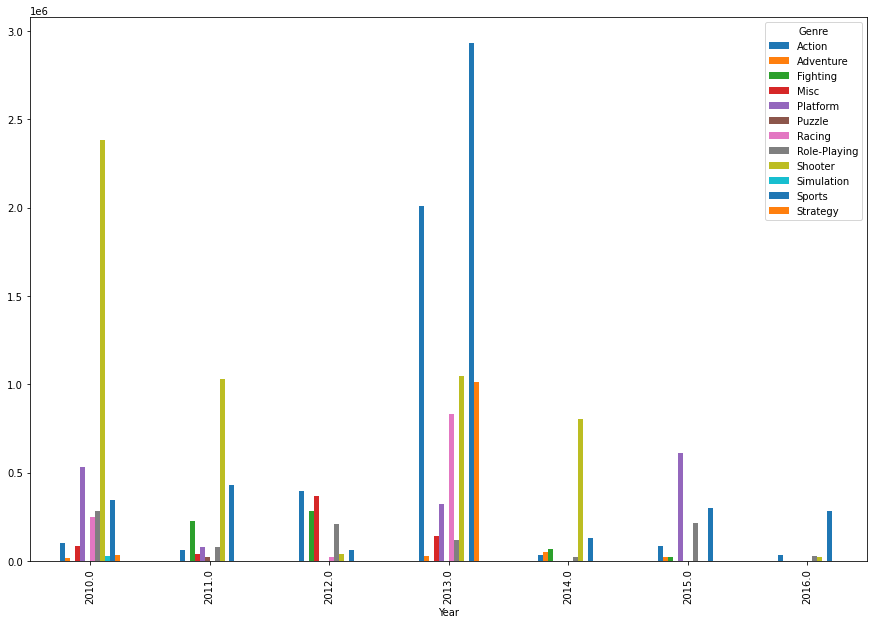

In [29]:
df3_best_n.plot(x= 'Year', y= header, kind="bar",figsize=(15,10)) #최근 10년간 매우 잘팔린 장르
plt.show()

In [30]:
df4 = df1[df1['Genre']=='Shooter'] 
df4= pd.DataFrame(df4.groupby(['Platform'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #장르는 shooter로 정했고 플랫폼에 따른 수익
df4

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,0.973182,0.059545,0.000000,0.010909
3DS,0.103333,0.055000,0.033333,0.013333
DC,0.000000,0.000000,0.110000,0.000000
DS,0.164000,0.014750,0.008000,0.013750
GB,0.400000,0.390000,0.360000,0.040000
GBA,0.059744,0.022051,0.008205,0.000513
GC,0.212128,0.061489,0.007872,0.007021
GEN,0.000000,0.000000,0.130000,0.000000
N64,0.604783,0.174348,0.044348,0.011304


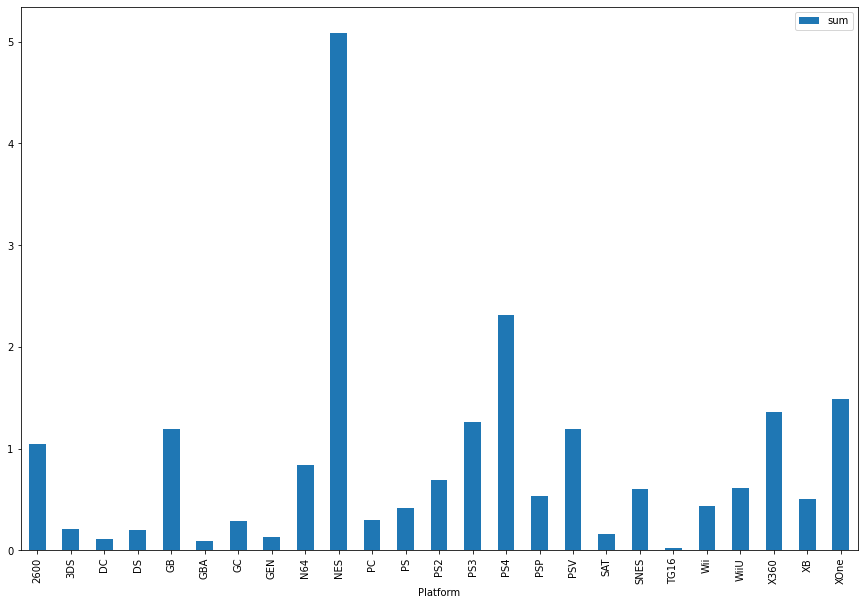

In [31]:
header = list(df4.columns.values)
df4["sum"] = df4[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df4= df4.reset_index()

df4.plot(x= 'Platform', y='sum', kind="bar",figsize=(15,10))
plt.show()

In [32]:
df4_n = df_n[df_n['Genre']=='Shooter']
df4_n = pd.DataFrame(df4_n.groupby(['Platform'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #최근 15년치 데이터들만
df4_n

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
3DS,0.103333,0.055000,0.033333,0.013333
DS,0.167143,0.022857,0.000000,0.012857
PC,0.112254,0.186197,0.000000,0.044930
PS2,0.030000,0.020000,0.000000,0.010000
PS3,0.530737,0.535158,0.074737,0.205263
PS4,0.856207,1.018621,0.072069,0.370345
PSP,0.090000,0.070000,0.045000,0.045000
PSV,0.423333,0.483333,0.060000,0.226667
Wii,0.171667,0.058889,0.000556,0.020556


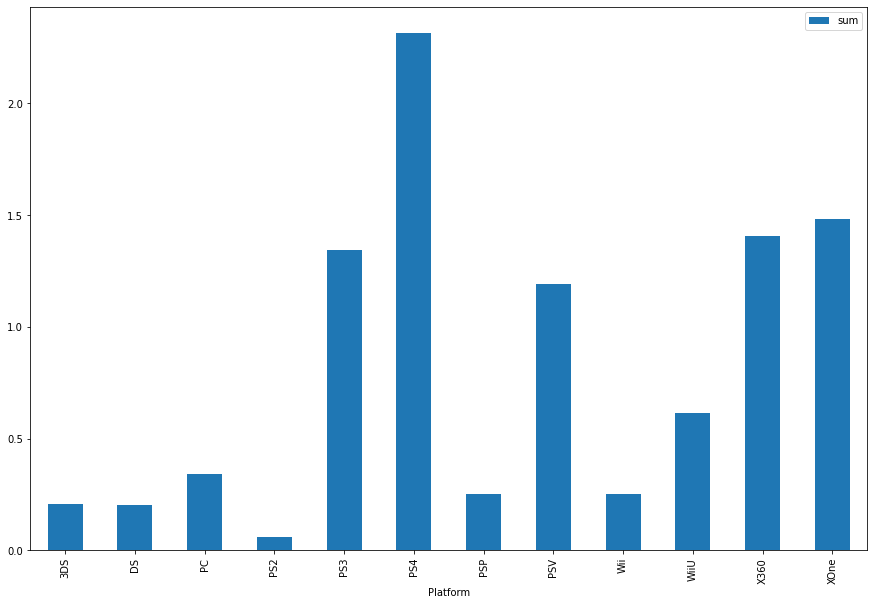

In [33]:
header = list(df4_n.columns.values)
df4_n["sum"] = df4_n[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df4_n= df4_n.reset_index()

df4_n.plot(x= 'Platform', y='sum', kind="bar",figsize=(15,10))
plt.show()

In [34]:
F_statistic, pVal = stats.f_oneway( df4_n['NA_Sales'],df4_n['EU_Sales'], df4_n['JP_Sales'],df4_n['Other_Sales'])
pVal

0.0027997539825703375

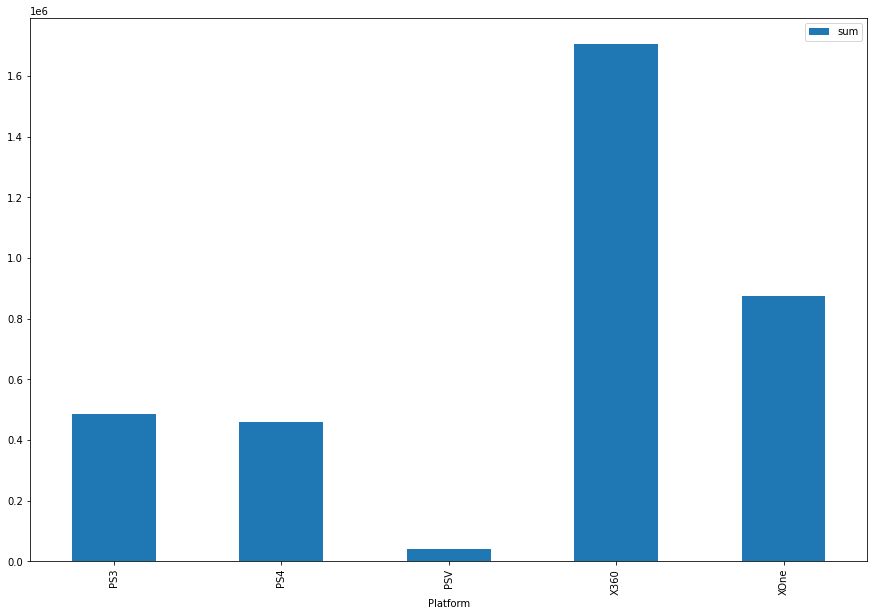

In [35]:
df4_best = df_best_n[df_best_n['Genre']=='Shooter']
df4_best= pd.DataFrame(df4_best.groupby(['Platform'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #플랫폼에 따른 수익
header = list(df4_best.columns.values)
df4_best["sum"] = df4_best[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df4_best= df4_best.reset_index()

df4_best.plot(x= 'Platform', y='sum', kind="bar",figsize=(15,10))
plt.show()

In [36]:
df4_best_1 = df_best_n[df_best_n['Genre']=='Shooter']
df4_best_1 = df4_best_1[df4_best_1['Year']>=2010]
df4_best_1

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
18,Bulletstorm,X360,2011.0,Shooter,Electronic Arts,610000.00,320000.00,0.01,0.08
24,Destiny: The Collection,PS4,2016.0,Shooter,Activision,10000.00,0.04,0.00,0.01
69,Touhou Genso Rondo: Bullet Ballet,PS4,2016.0,Shooter,Nippon Ichi Software,10000.00,0.00,0.00,0.00
70,Alien: Isolation,XOne,2014.0,Shooter,Sega,220000.00,0.24,0.00,0.04
77,Call of Duty: Ghosts,PS4,2013.0,Shooter,Activision,1780000.00,1.42,0.05,0.38
95,Front Mission Evolved,X360,2010.0,Shooter,Square Enix,100000.00,0.07,0.02,0.02
99,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78
159,Destiny,PS3,2014.0,Shooter,Activision,0.67,660000.00,0.12,0.27
192,Quantum Theory,X360,2010.0,Shooter,Tecmo Koei,0.06,20000.00,0.00,0.01
202,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2130000.00,0.06,0.69


In [37]:
df5= df_n[df_n['Genre']=='Shooter'] 
df5= pd.DataFrame(df5.groupby(['Publisher'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #장르는 shooter로 정했고 플랫폼에 따른 수익
df5

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
505 Games,0.168000,0.134667,0.005333,0.044667
5pb,0.000000,0.000000,0.015000,0.000000
Activision,1.433125,0.987031,0.054688,0.342031
Alchemist,0.000000,0.000000,0.030000,0.000000
Atari,0.050000,0.000000,0.000000,0.000000
Bethesda Softworks,0.281250,0.312500,0.010625,0.096250
Bohemia Interactive,0.000000,0.100000,0.000000,0.020000
Capcom,0.182500,0.148125,0.094375,0.053750
Cave,0.006667,0.000000,0.020000,0.000000


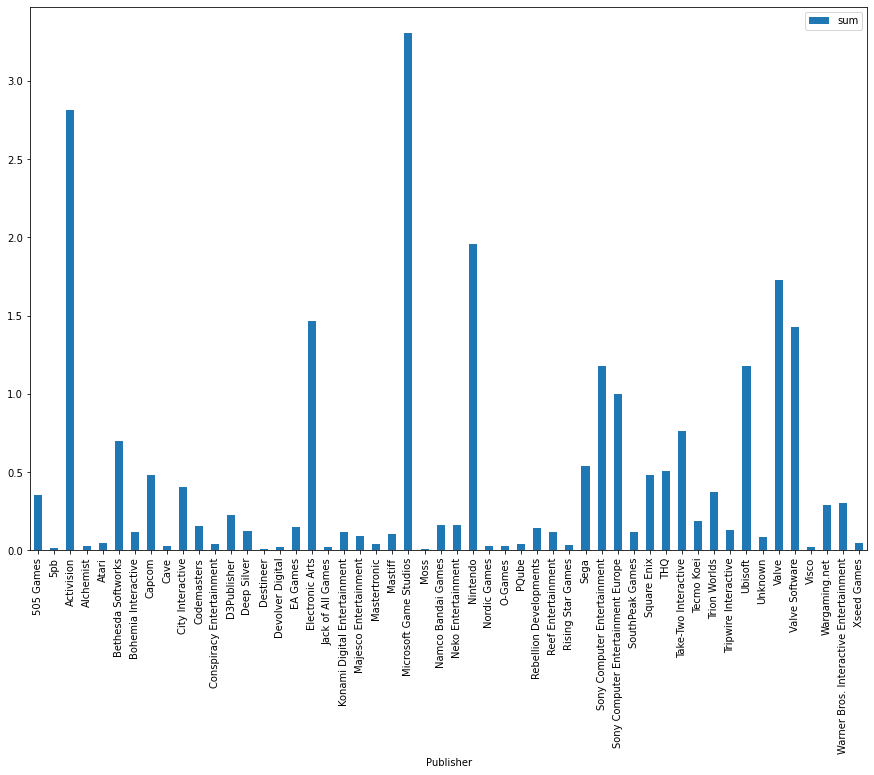

In [38]:
header = list(df5.columns.values)
df5["sum"] = df5[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df5= df5.reset_index()

df5.plot(x= 'Publisher', y='sum', kind="bar",figsize=(15,10))
plt.show()

In [39]:
df5_best = df_best_n[df_best_n['Genre']=='Shooter'] 
df5_best= pd.DataFrame(df5_best.groupby(['Publisher'])[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].mean()) #장르는 shooter로 정했고 플랫폼에 따른 수익
df5_best

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Activision,447500.970,547500.365,0.045,0.260
Codemasters,0.100,0.150,0.010,30000.000
Electronic Arts,305002.230,1225000.000,0.035,0.385
Microsoft Game Studios,7030000.000,1.980,0.080,0.780
Nippon Ichi Software,10000.000,0.000,0.000,0.000
Sega,220000.000,0.240,0.000,0.040
Sony Computer Entertainment,0.290,0.150,40000.000,0.070
Square Enix,100000.000,0.070,0.020,0.020
Take-Two Interactive,0.405,0.385,0.025,175000.000


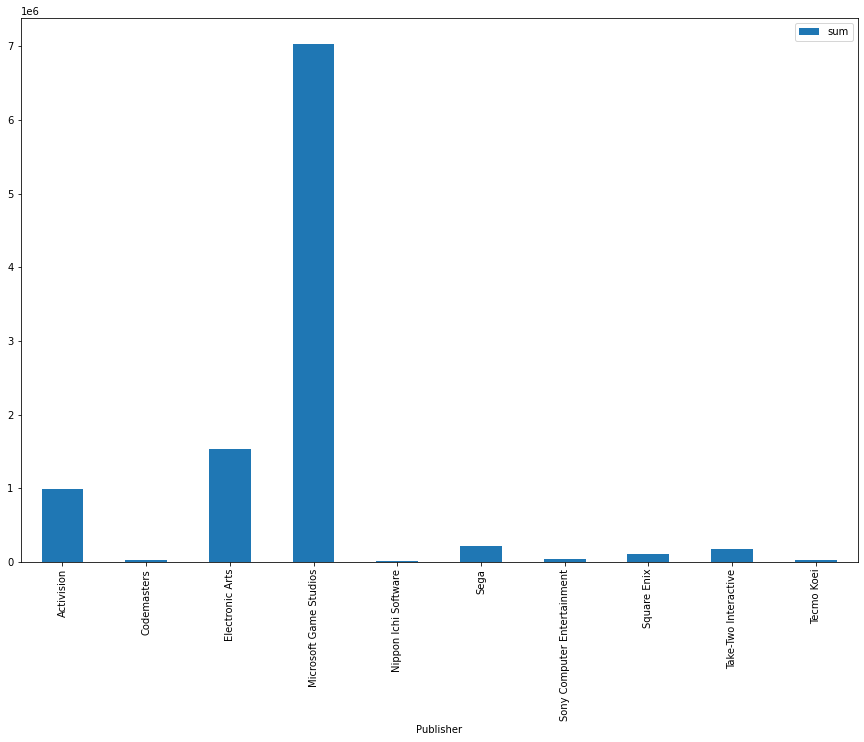

In [40]:
header = list(df5_best.columns.values)
df5_best["sum"] = df5_best[['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
df5_best= df5_best.reset_index()

df5_best.plot(x= 'Publisher', y='sum', kind="bar",figsize=(15,10))
plt.show()

In [41]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [42]:
model = ols('NA_Sales ~ C(Genre)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Genre),11.0,1.423042e+11,1.293675e+10,0.859395,0.580134
Residual,16129.0,2.427950e+14,1.505332e+10,NaN,NaN


In [43]:
model = ols('NA_Sales ~ C(Genre)*C(Platform)', df).fit()
anova_lm(model, typ = 3)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 330, but rank is 260
  'rank is %d' % (J, J_), ValueWarning)


,sum_sq,df,F,PR(>F)
Intercept,1.102976e+01,1.0,7.261278e-10,0.999979
C(Genre),1.049952e+10,11.0,6.283817e-02,0.999992
C(Platform),7.592878e+11,30.0,1.666219e+00,0.012545
C(Genre):C(Platform),1.991396e+12,330.0,3.972744e-01,1.000000
Residual,2.407285e+14,15848.0,NaN,NaN


결과는 Genre 에 따라 매출이 달라지고 platform에 따라 매출이 달라지낟. 그리고 게임의 장르와 플랫폼이 두개가 상호작용을 한다.

장르와 수입들 중에서 수입들로 scaater 그래프를 그리고  k-means 를 한다면 지역에 따라 장르가 바뀌지 않는다는 것을 더 잘 보여 줄수 있지 않을까. 

In [56]:
df2T= df2.T
F_statistic, pVal = stats.f_oneway(df2T.NA_Sales, df2T.EU_Sales, df2T.JP_Sales, df2T.Other_Sales)
pVal


3.6913157003988554e-08

In [53]:
df2T

index,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.257654,0.155841,0.048209,0.056349
Adventure,0.078609,0.048891,0.041166,0.012966
Fighting,0.261696,0.117525,0.102797,0.042760
Misc,0.236346,0.124603,0.063598,0.043512
Platform,0.498972,0.223567,0.147654,0.058102
Puzzle,0.217093,0.091316,0.102687,0.022194
Racing,0.286687,0.190537,0.044395,0.062853
Role-Playing,0.201792,0.113824,0.225262,0.036183
Shooter,0.444041,0.239000,0.029780,0.078724


In [68]:
np.cov(df2T.NA_Sales, df2T.Other_Sales)

array([[0.01440042, 0.00202766],
       [0.00202766, 0.00039874]])

In [70]:
chi2_contingency(df2T)

(0.4715418107758973,
 1.0,
 33,
 array([[0.254375  , 0.13705237, 0.08345379, 0.04317182],
        [0.08918508, 0.04805121, 0.02925929, 0.01513625],
        [0.25767674, 0.13883129, 0.08453701, 0.04373219],
        [0.22982697, 0.12382636, 0.07540022, 0.0390056 ],
        [0.45581255, 0.24558306, 0.14954018, 0.07735925],
        [0.21275491, 0.11462827, 0.06979932, 0.03610818],
        [0.28698809, 0.15462368, 0.09415329, 0.04870683],
        [0.28334914, 0.15266309, 0.09295945, 0.04808923],
        [0.38866524, 0.20940538, 0.12751091, 0.06596319],
        [0.2246901 , 0.12105872, 0.07371495, 0.03813379],
        [0.27534873, 0.14835262, 0.09033472, 0.04673143],
        [0.12581004, 0.06778404, 0.04127499, 0.02135213]]))